CAPÍTULO 16 - Clustering
-

Os métodos de aprendizado de máquina podem ser classificados em duas principais categorias: aprendizado supervisionado e apredizado não supervisionado

Até agora usamos aprendizado supervisionado pois treinamos com um alvo y ou uma variável resposta ou seja, sabiamos qual a reposta "correta". Já o não supervisionado nós não sabemos qual é a resposta "correta". Muitos desses métodos envolvem clustering (agrupamento), e dois métodos principais: clustering k-means e clustering hierárquico.

16.2 k-means

Usaremos dados sobre vinhos em nosso exemplo de k-means

In [100]:
import pandas as pd

wine = pd.read_csv('../../data/wine.csv')

print(wine.head())

   Cultivar  Alcohol  Malic acid   Ash  Alcalinity of ash    Magnesium  \
0         1    14.23        1.71  2.43                 15.6        127   
1         1    13.20        1.78  2.14                 11.2        100   
2         1    13.16        2.36  2.67                 18.6        101   
3         1    14.37        1.95  2.50                 16.8        113   
4         1    13.24        2.59  2.87                 21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline              
0             5.64  1.04                          

Vamos descartar a coluna cultivar pois ela se relaciona muito de perto com os clusters em nossos dados

In [101]:
wine = wine.drop('Cultivar', axis=1)
print(wine.head())

   Alcohol  Malic acid   Ash  Alcalinity of ash    Magnesium  Total phenols  \
0    14.23        1.71  2.43                 15.6        127           2.80   
1    13.20        1.78  2.14                 11.2        100           2.65   
2    13.16        2.36  2.67                 18.6        101           2.80   
3    14.37        1.95  2.50                 16.8        113           3.85   
4    13.24        2.59  2.87                 21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline          

A sklearn têm uma im plementação do algoritimo de k-means chamado KMeans. Nesse exemplo, definiremos k = 3 e usaremos todos os dados de nosso conjunto

In [102]:
from sklearn.cluster import KMeans
import os
os.environ["OMP_NUM_THREADS"] = "1"

#cria 3 clusters
#usa uma semente aleatória igual a 42
#você pode optar por não usar random_state ou pode usar um valor diferente; 42 garantirá que seus resultados sejam iguais àqueles exibidos no livro

kmeans = KMeans(n_clusters=3, random_state=42).fit(wine.values)

c:\Users\User\anaconda3\envs\pfe_certo\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [103]:
print(kmeans)

KMeans(n_clusters=3, random_state=42)


In [104]:
import numpy as np
print(np.unique(kmeans.labels_, return_counts=True))

(array([0, 1, 2]), array([102,  49,  27], dtype=int64))


In [105]:
#é possível transformar esses rótulos em um dataframe
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])
print(kmeans_3.head())

   cluster
0        1
1        1
2        2
3        2
4        1


Por fim podemos vizualizar nosso cluster, porém precisamos diminuir suas dimensões para 3 já que somos seres humanos, e no livro se possível para 2 já que é uma mídia não interativa

16.2.1 Redção de dimensões com PCA

PCA (Principal Component Analysis, ou análise de componentes principais), é uma técnica usada para reduzar o número de dimensões. É como se tivessemos um objeto 3d e lançassemos usa luz sobre ele para criar uma sombra e ir para um plano 2d.

In [106]:
from sklearn.decomposition import PCA

In [107]:
#informamos à PCA quantas dimensões (componentes principais) que queremos projetar nossos dados

#projeta para 2 componentes
pca = PCA(n_components=2).fit(wine)

In [108]:
#agora temos de adicionar nossos dados em um novo espaço e adicionar a transformação em nosso df

#transforma os dados em um novo espaço
pca_trans = pca.transform(wine)

#dá nome as projeções
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
print(pca_trans_df)

#conecta nossos dados
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)

print(kmeans_3.head())

           pca1       pca2
0    318.562979  21.492131
1    303.097420  -5.364718
2    438.061133  -6.537309
3    733.240139   0.192729
4    -11.571428  18.489995
..          ...        ...
173   -6.980211  -4.541137
174    3.131605   2.335191
175   88.458074  18.776285
176   93.456242  18.670819
177 -186.943190  -0.213331

[178 rows x 2 columns]
   cluster        pca1       pca2
0        1  318.562979  21.492131
1        1  303.097420  -5.364718
2        2  438.061133  -6.537309
3        2  733.240139   0.192729
4        1  -11.571428  18.489995


Agora podemos plotar nossos resultados

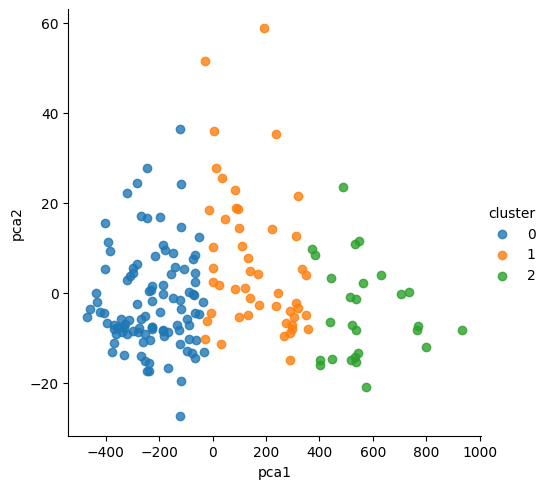

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.lmplot(data=kmeans_3, x='pca1', y='pca2',
                 hue='cluster', fit_reg=False)

plt.show()

Agora que vimos o que k-means faz com os dados, vamos carregar novamente o conjunto de dados original e manter Cultivar

In [110]:
wineAll = pd.read_csv('../../data/wine.csv')
print(wineAll.head())

   Cultivar  Alcohol  Malic acid   Ash  Alcalinity of ash    Magnesium  \
0         1    14.23        1.71  2.43                 15.6        127   
1         1    13.20        1.78  2.14                 11.2        100   
2         1    13.16        2.36  2.67                 18.6        101   
3         1    14.37        1.95  2.50                 16.8        113   
4         1    13.24        2.59  2.87                 21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline              
0             5.64  1.04                          

Execultaremos PCA novamente em nossos dados e compararemos os clusters da PCA com as variáveis Cultivar

In [111]:
pca_all = PCA(n_components=2).fit(wineAll)
pca_all_trans = pca_all.transform(wineAll)
pca_all_trans_df = pd.DataFrame(pca_all_trans,
                                columns=['pca_all_1', 'pca_all_2'])

kmeans_3 = pd.concat([kmeans_3,
                      pca_all_trans_df,
                      wineAll['Cultivar']],
                      axis=1)

Podemos comparar os agrupamentos com facetas em nossa plotagem

Cultivar   1   2   3  All
cluster                  
0          1  64  37  102
1         31   7  11   49
2         27   0   0   27
All       59  71  48  178


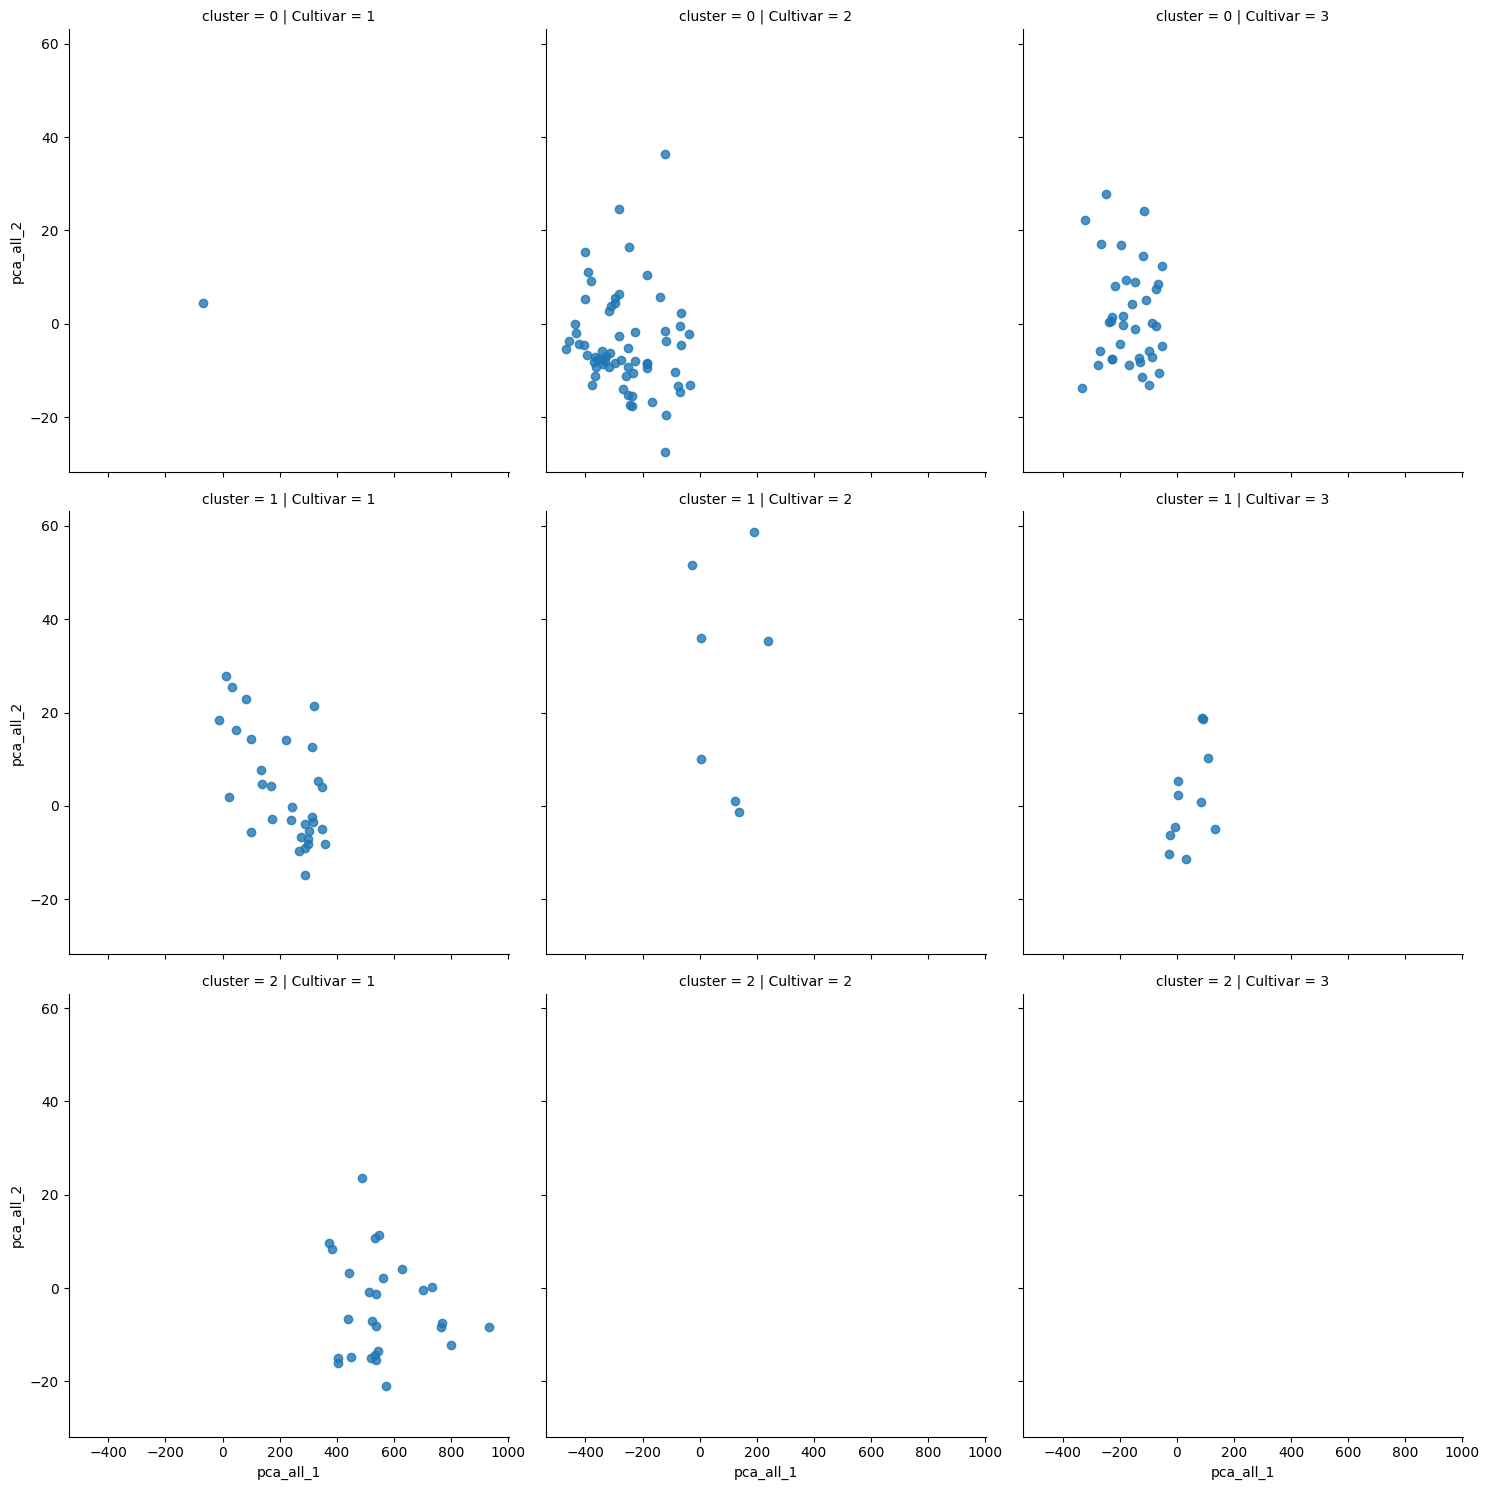

In [112]:
with sns.plotting_context(font_scale=5):
    fig = sns.lmplot(data=kmeans_3, x='pca_all_1', y='pca_all_2',
                row='cluster', col='Cultivar', fit_reg=False)

print(pd.crosstab(kmeans_3['cluster'],
                  kmeans_3['Cultivar'],
                  margins=True))

plt.show()

16.3 Clustering hierárquico

Oclustering hierárquico cria uma hierarquia de cluster. Isso pode ser obtido por meio de uma abordagem bottom-up (aglomerativa) ou top-down (decisiva)

In [113]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

wine = pd.read_csv('../../data/wine.csv')
wine = wine.drop('Cultivar', axis=1)

16.3.1 Clustering completo

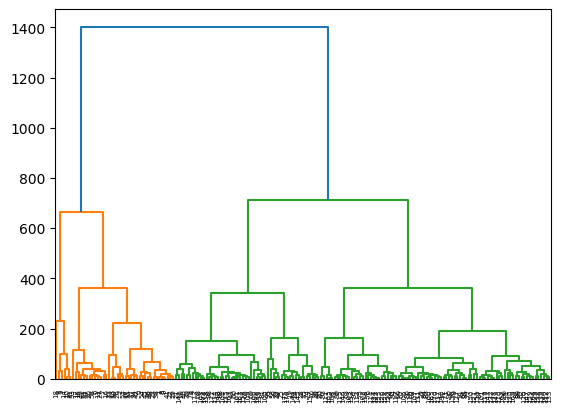

In [114]:
wine_complete = hierarchy.complete(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_complete)
plt.show()

16.3.2 Clustering simples

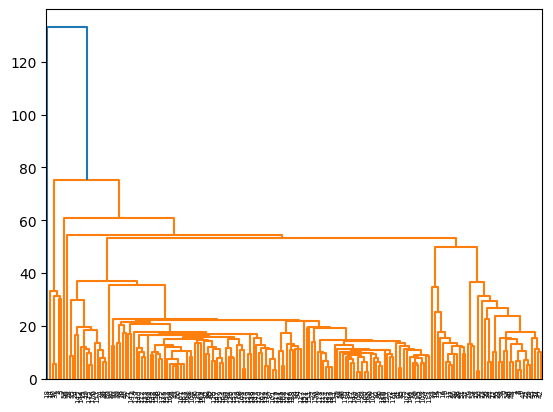

In [115]:
wine_single = hierarchy.single(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_single)
plt.show()

16.3.3 Clustering com médias

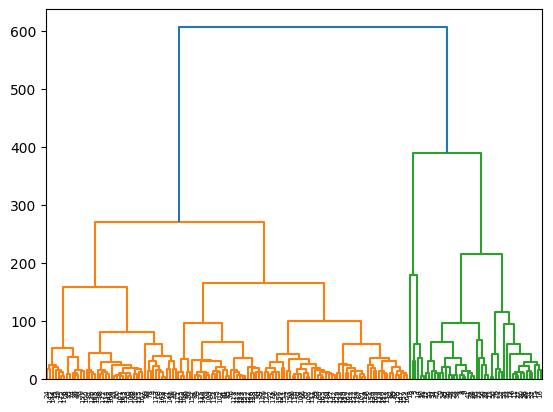

In [116]:
wine_avarage = hierarchy.average(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_avarage)
plt.show()

16.3.4 Clustering com centroide

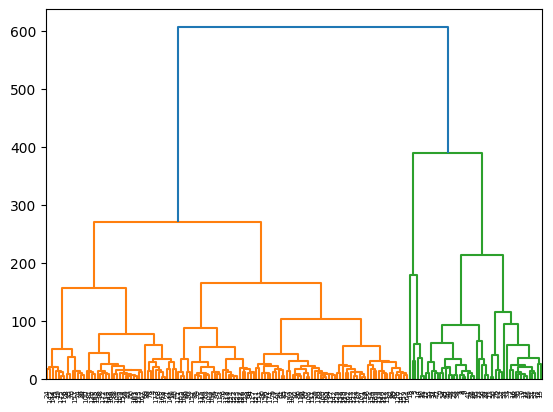

In [117]:
wine_centroid = hierarchy.centroid(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_centroid)
plt.show()

16.3.5 Definindo manualmente o limite

Podemos passar um valor para color_threshold a fim de colorir os grupos com base em um limite específico. Por padrão, a scipy usa os valores default do MATLAB

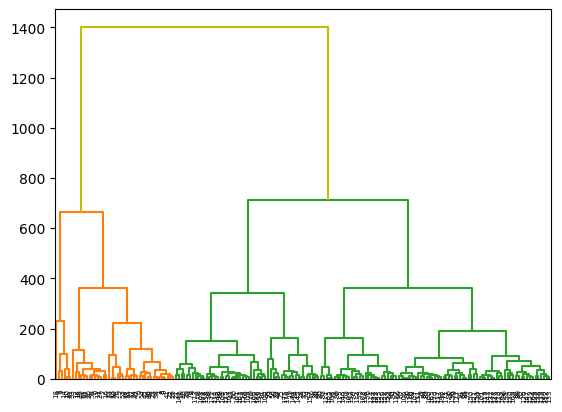

In [118]:
wine_complete = hierarchy.complete(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(
    wine_complete,

    #valores default do MATPLOT
    color_threshold=0.7 * max(wine_complete[:,2]),
    above_threshold_color='y'
)

plt.show()

16.4 Conclusão

Misturar vários tipos técnicas de análise para solucionar um problema é uma pratica comum, por exemplo, você poderia usar um método de análise não supervisionado para agrupar seus dados e então utilizar esses clusters como caraterístics em outro método de análise